## Configuracion

In [1]:
import os, struct, os.path
import Image
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros
os.chdir('..')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import sys
caffe_root = '/home/lex/caffe-master/'  # CONFIGURAR PARA CADA PC!!
sys.path.append("/home/lex/caffe-master/python")

import caffe # Importa la libreria CAFFE

In [2]:
# Elegimos el tipo de solver para la red
solver = caffe.SGDSolver('/home/lex/2_SISTEMIC/9_Deep_Learning/3_Arquitecturas/Arq_1/algas/Arc_1_Algas_solver.prototxt')

In [3]:
# Configuramos el hardware que usaremos para entrenar
caffe.set_device(0)
caffe.set_mode_gpu()

## Entrenamiento

In [4]:
%%time 
niter = 200 # el SGD solo realizara 200 iteraciones
test_interval = 25 # probaremos el conjunto de prueba cada 25 iteraciones

# Aqui se crean las estructuras para alojar los datos de entrenamiento
train_loss = np.zeros(niter) # guarda loss
test_acc = np.zeros(int(np.ceil(niter / test_interval))) # guarda accuracy
#output = np.zeros((niter, 8, 10)) # guarda salida de la red

# Main loop entrenamiento
for it in range(niter):
    solver.step(1)  # Se ejecuta q vez el SGD
    
    # guarda loss
    train_loss[it] = solver.net.blobs['loss'].data
    
   
    # Para correr  pruebas cada 25 iteraciones lo configuramos aca, CAFFE puede 
    # configurarse para hacerlo automaticamente si se desea.
    if it % test_interval == 0:
        print 'Iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()#images, labels = load_mnist('testing', digits=[2],path='/home/lex/caffe-master/data/mnist/')
            correct += sum(solver.test_nets[0].blobs['ip2'].data.argmax(1)
                           == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4# Aqui se carga el modelo preentrenado

Iteration 0 testing...
Iteration 25 testing...
Iteration 50 testing...
Iteration 75 testing...
Iteration 100 testing...
Iteration 125 testing...
Iteration 150 testing...
Iteration 175 testing...
CPU times: user 1min 1s, sys: 9.99 s, total: 1min 11s
Wall time: 1min 2s


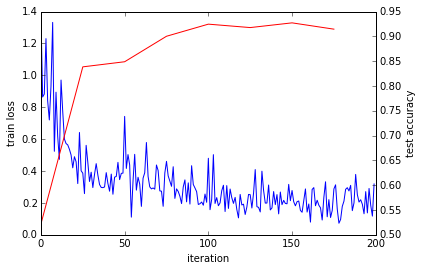

In [5]:
#Mostramos el train error y el test accuracy
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(niter), train_loss)
ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')# Aqui se carga el modelo preentrenado
ax2.set_ylabel('test accuracy')

## Validacion

In [2]:
# Aqui se carga el modelo preentrenado
MODEL_FILE = '/home/lex/2_SISTEMIC/9_Deep_Learning/3_Arquitecturas/Arq_1/algas/Arc_1_Algas_deploy.prototxt'
PRETRAINED = '/home/lex/2_SISTEMIC/9_Deep_Learning/3_Arquitecturas/Arq_1/algas/snapshots/_iter_100.caffemodel'

In [3]:
# Crea la redfor it in images:
caffe.set_mode_cpu()
net = caffe.Classifier(MODEL_FILE,PRETRAINED)

In [15]:
#images, labels = load_mnist('testing', digits=[2],path='/home/lex/caffe-master/data/mnist/')

error=0
errorClass1=0
errorClass2=0
errorClass3=0
errorClass4=0
totalFiles=0
for it in range(4):
    
    path = '/home/lex/2_SISTEMIC/9_Deep_Learning/1_Datasets/1_Microalgas/gray/testing/'+str(it)+'/'
    num_files = sum(os.path.isfile(os.path.join(path, f)) for f in os.listdir(path))
    totalFiles=totalFiles+num_files
    for it2 in range(num_files):
        IMAGE_FILE = path + str(it2+1) + '.jpg'# Path de la imagen
        input_image = caffe.io.load_image(IMAGE_FILE,False)#carga una imagen en el modelo
        prediction = net.predict([input_image]) 
        
        print 'Clase',it2,it,num_files,prediction[0].argmax()
        
        if prediction[0].argmax()!=it:
            error=error+1
            if it==0:
                errorClass1=errorClass1+1;
            if it==1:
                errorClass2=errorClass2+1;
            if it==2:
                errorClass3=errorClass3+1;    
            if it==3:
                errorClass4=errorClass4+1;
            

from __future__ import division
print 'Error de prueba:',(error/totalFiles)*100,'%'        

Clase 0 0 1260 0
Clase 1 0 1260 0
Clase 2 0 1260 0
Clase 3 0 1260 1
Clase 4 0 1260 0
Clase 5 0 1260 0
Clase 6 0 1260 0
Clase 7 0 1260 0
Clase 8 0 1260 1
Clase 9 0 1260 2
Clase 10 0 1260 0
Clase 11 0 1260 0
Clase 12 0 1260 0
Clase 13 0 1260 0
Clase 14 0 1260 0
Clase 15 0 1260 0
Clase 16 0 1260 0
Clase 17 0 1260 0
Clase 18 0 1260 0
Clase 19 0 1260 1
Clase 20 0 1260 0
Clase 21 0 1260 0
Clase 22 0 1260 0
Clase 23 0 1260 0
Clase 24 0 1260 0
Clase 25 0 1260 2
Clase 26 0 1260 0
Clase 27 0 1260 0
Clase 28 0 1260 0
Clase 29 0 1260 0
Clase 30 0 1260 1
Clase 31 0 1260 0
Clase 32 0 1260 0
Clase 33 0 1260 0
Clase 34 0 1260 1
Clase 35 0 1260 0
Clase 36 0 1260 0
Clase 37 0 1260 1
Clase 38 0 1260 0
Clase 39 0 1260 0
Clase 40 0 1260 0
Clase 41 0 1260 0
Clase 42 0 1260 0
Clase 43 0 1260 0
Clase 44 0 1260 0
Clase 45 0 1260 0
Clase 46 0 1260 1
Clase 47 0 1260 0
Clase 48 0 1260 0
Clase 49 0 1260 1
Clase 50 0 1260 0
Clase 51 0 1260 1
Clase 52 0 1260 0
Clase 53 0 1260 1
Clase 54 0 1260 0
Clase 55 0 1260 0
Cl

[[2 0 0]
 [0 0 1]
 [1 0 2]]


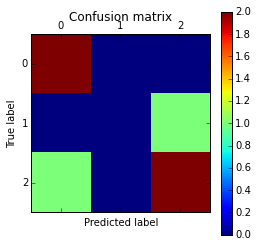

In [20]:
 from sklearn.metrics import confusion_matrix
 y_true = [2, 0, 2, 2, 0, 1]
 y_pred = [0, 0, 2, 2, 0, 2]
 cm=confusion_matrix(y_true, y_pred)


print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
print 'Error clase 1:',(errorClass1/1260)*100,'%' 
print 'Error clase 2:',(errorClass2/5410)*100,'%' 
print 'Error clase 3:',(errorClass3/5921)*100,'%' 
print 'Error clase 4:',(errorClass4/126)*100,'%' 


Error clase 1 15.0 %
Error clase 2 7.48613678373 %
Error clase 3 4.98226650904 %
Error clase 4 38.8888888889 %
